<a href="https://colab.research.google.com/github/iris10130901/AI_Project/blob/main/MySQL%E9%81%8B%E7%94%A8%E6%B1%BD%E8%BB%8A%E9%9B%B6%E5%94%AE%E5%95%86%E6%95%B8%E6%93%9A%E5%BA%AByiibaidb_%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# yiibaidb 資料庫:


- customers: 儲存客戶的數據。
- products: 儲存汽車的數據。
- productLines: 儲存產品類別數據。
- orders: 儲存客戶訂購的銷售訂單。
- orderDetails: 儲存每個銷售訂單的訂單產品數據項。
- payments: 儲存客戶訂單的付款數據信息。
- employees: 儲存所有員工信息以及組織結構，例如，直接上級(誰向誰報告工作)。
- offices: 儲存銷售處數據，類似於各個分公司。



1. 各年最暢銷的產品與最滯銷的產品及其銷售額
2. 最大的客戶來源(國家)與其最常購買之商品
3. 最熱銷的產品是來自哪個生產線
4. 誰是最佳銷售員?
5. 信用額度最高的客戶購買了哪些產品


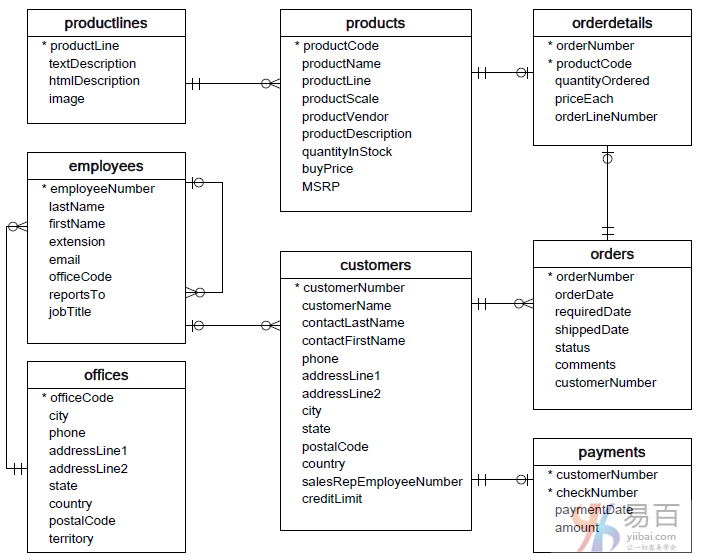

# Step:
1. GROUP BY . SUM
  - 用客戶編號 日期 產品 做GROUPBY BY 年月日
  - 2013-2015年
  - 每個月做小記SUM 
  - 單獨拆年月出來
  - 針對年 / 月分別去做GROUPBY
2. 增加一個"銷售額" = quantityOrdered * priceEach

# 五個解法:


## 1.各年最暢銷的產品與最滯銷的產品及其銷售額 

## 1.1 各年最暢銷的產品與最滯銷的產品及其銷售額  By 「年、月」

## 最暢銷產品: 





- 首先將Oorderdetails 用兩個表中的orderNumber串接INNER JOIN order
- 將productCode,quantityOrdered進行加總變成sum2 ,增加一個變數sales是以quantityOrdered銷量*priceEach價格為銷售額 並以年月去看(%Y-%M)
- 加入子查詢以productCode,去看數量最大的及銷售額最大的 去GROUP BY YEARS,productCode
- 將整個SELECT內容去GROUP BY YEARS
- ORDER BY 銷量最大的


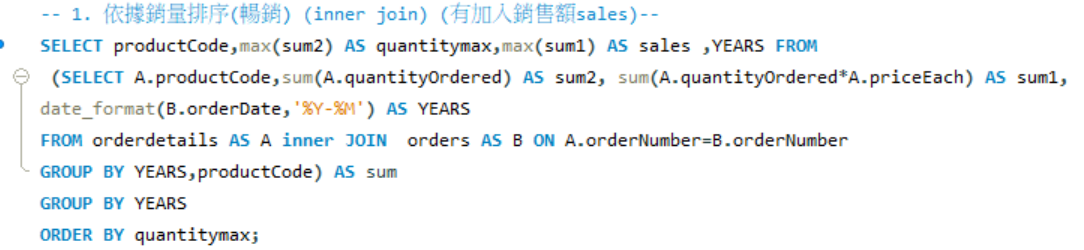

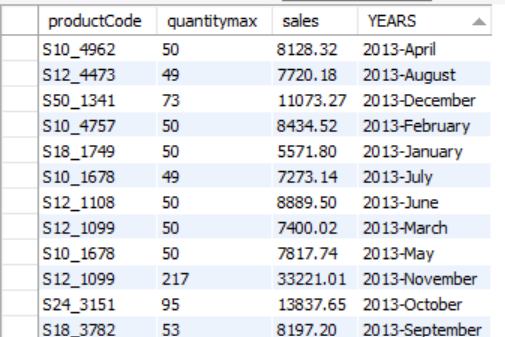

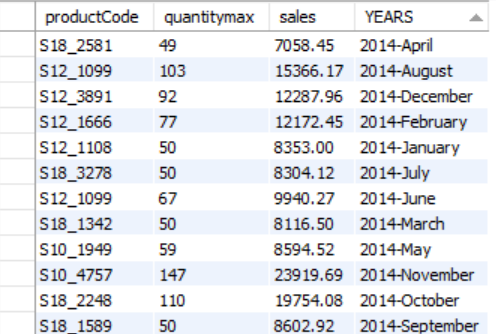

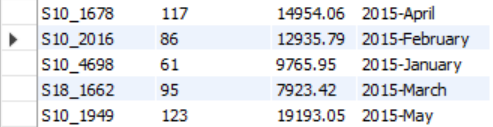

### 2013年 11月
- 銷量最多的商品為 **S12_1099** 
- 數量為  **217**
- 產品名為 **'1968 Ford Mustang'** 
- 銷售額為 **33221.01**

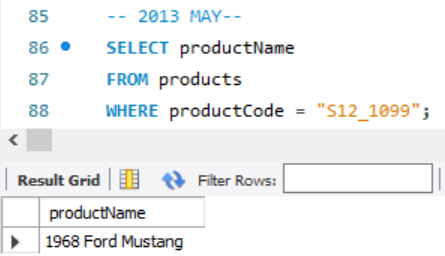

### 2014年 11月
- 銷量最多的商品為**S10_4757** 
- 數量為**147** 
- 產品名為 **'1972 Alfa Romeo GTA'** 
- 銷售額為 **23919.69**

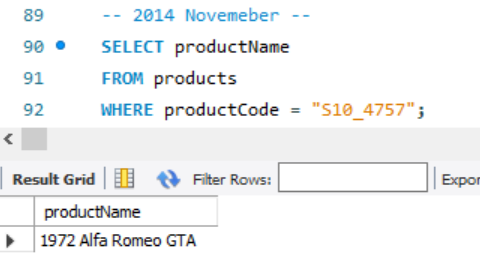

### 2015年 5月
- 銷量最多的商品為**S10_1949** 
- 數量為**123** 
- 產品名為 **'1952 Alpine Renault 1300'** 
- 銷售額為 **19193.05**

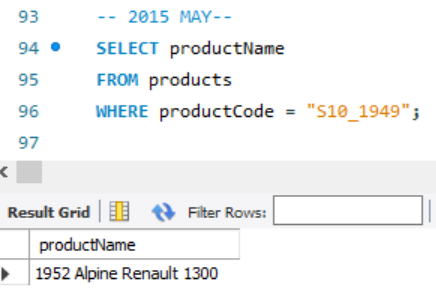


## 最滯銷產品: 







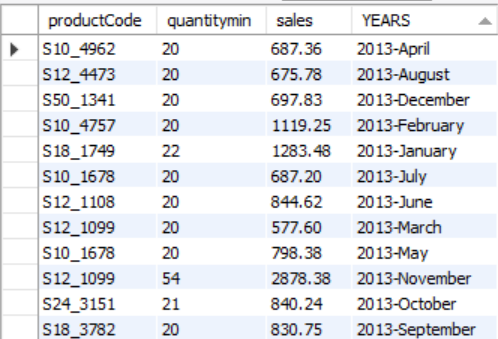

### 2013年 
- 各月份最低銷售數量幾乎都是 20 
- 以銷售額來說 2013 MARCH 是最低的
- 商品編號為**S12_1099**
- 產品名為**'1968 Ford Mustang'**
- 銷售額為:**577.60**

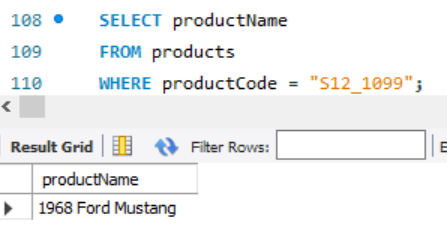

###2014年
- 各月份最低銷售數量幾乎都是 20 
- 以銷售額來說 2014 August 是最低的
- 商品編號為**S12_1099**
- 產品名為**'1968 Ford Mustang'**
- 銷售額為:**597.40**

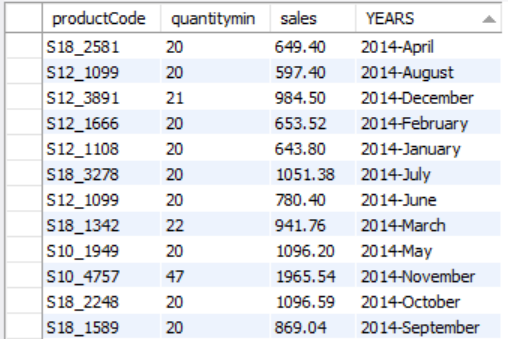

### 2015年 4月
- 銷量最低的商品為**S10_1678** 
- 數量為**6** 
- 產品名為 **'1969 Harley Davidson Ultimate Chopper'** 
- 銷售額為 **546.66**

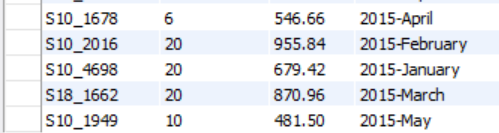

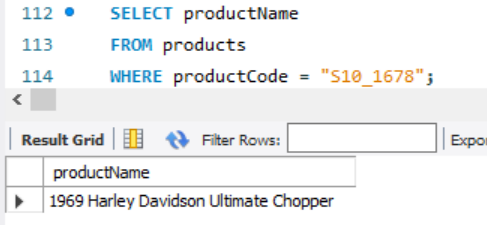

## 1.2  各年最暢銷的產品與最滯銷的產品及其銷售額  By 「年」

### 各年最暢銷的產品及其銷售額

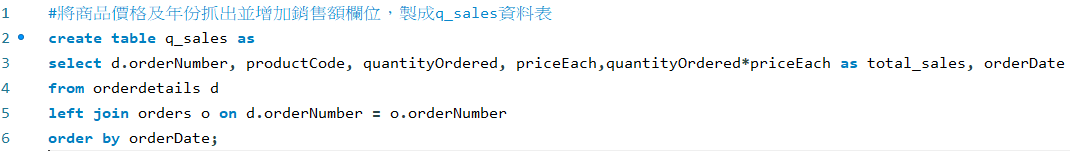

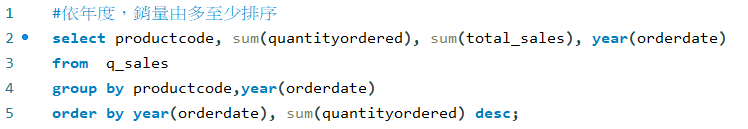

### 2013年

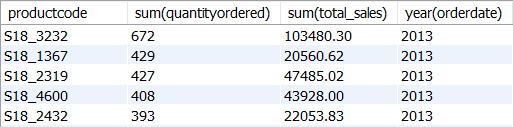

### 2014年

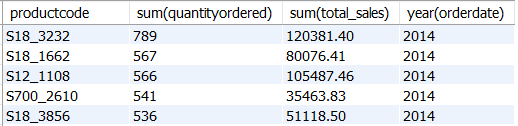

### 2015年

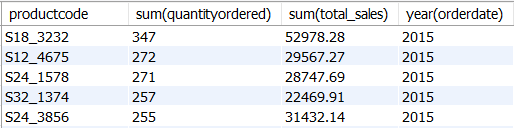

### 找出最暢銷商品的品名 S18_3232

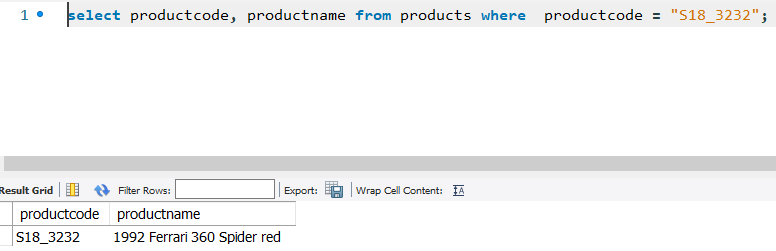

### 各年銷量最少的產品及其銷售額

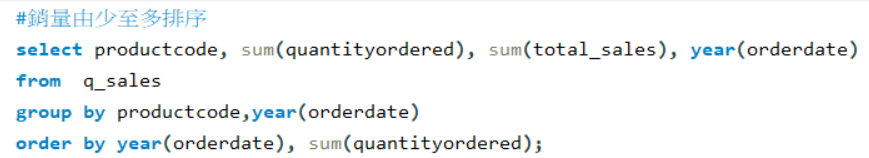

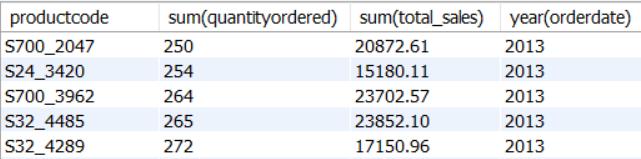

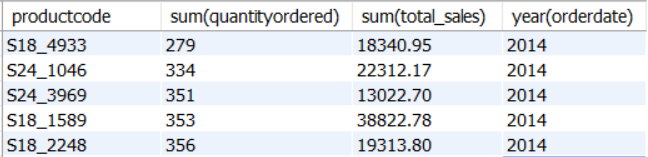

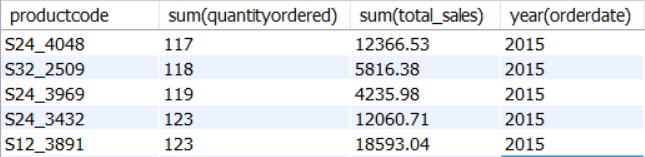

## 1.3 視覺化呈現

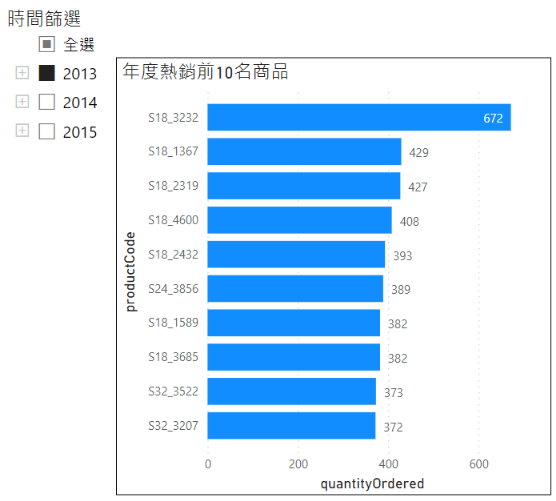

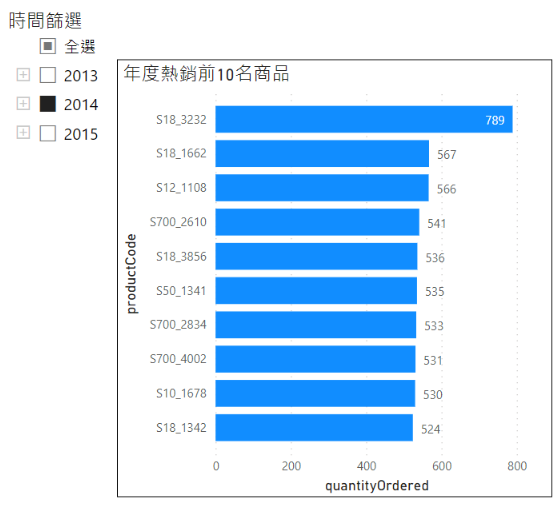

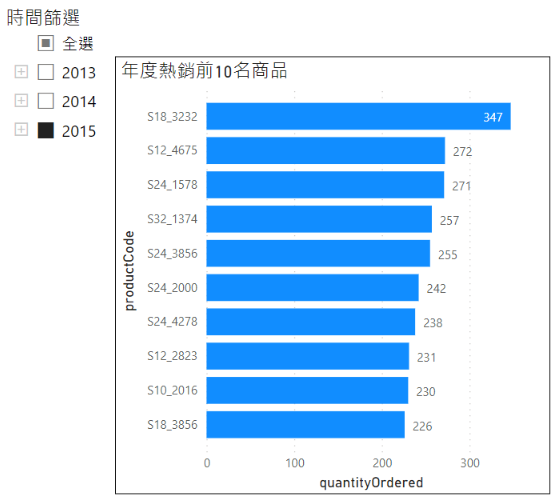

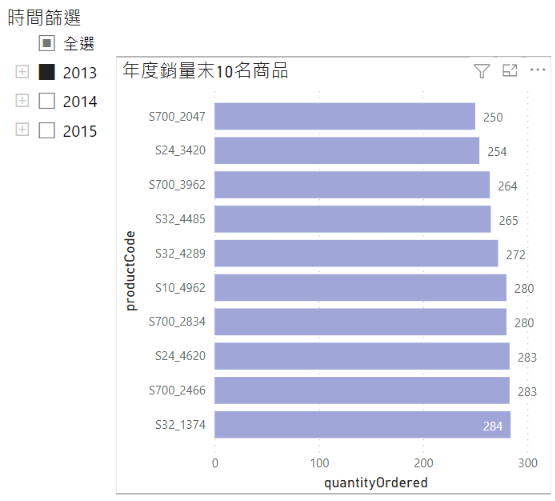

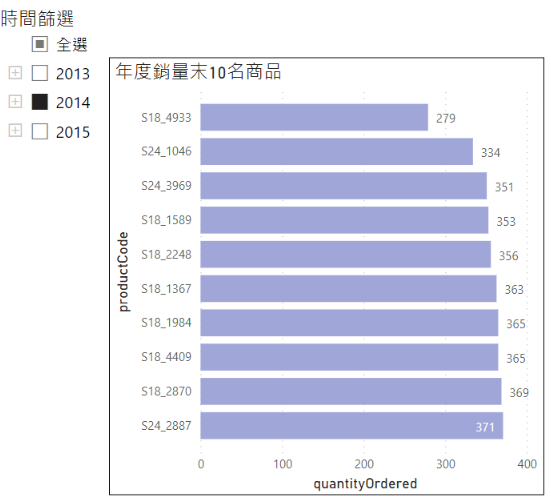

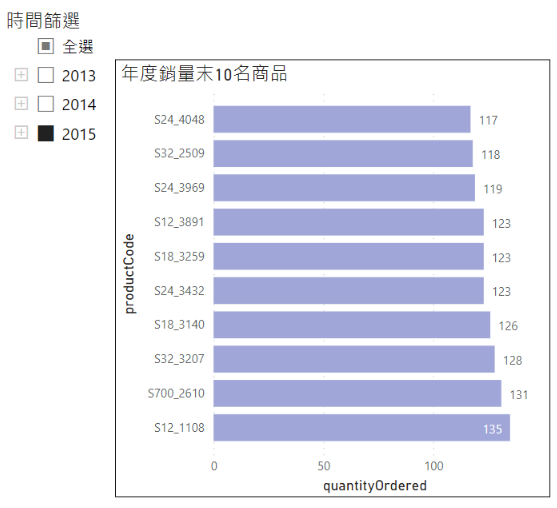

## 2 . 最大的客戶來源(國家)與其最常購買之商品

##最大客戶來源國家 - 依照「銷量」: USA
- 最常購買產品: '1957 Chevy Pickup'
- 數量為 523

- 首先將需要的表格先JOIN起來
- 去SELECT 國家、產品名、銷量的加總 AS CNT 
- 以ordertails和order去inner join WITH 一個暫存資料表叫做COUNTRY SELECT出國家、銷量的總和 去做子查詢
- GROUP BY 國家
- ORDER BY 國家
- LIMIT 1 只得出最高的
- 整體再GROUP BY 產品名
- ORDER BY CNT(銷量的總和) desc 排序

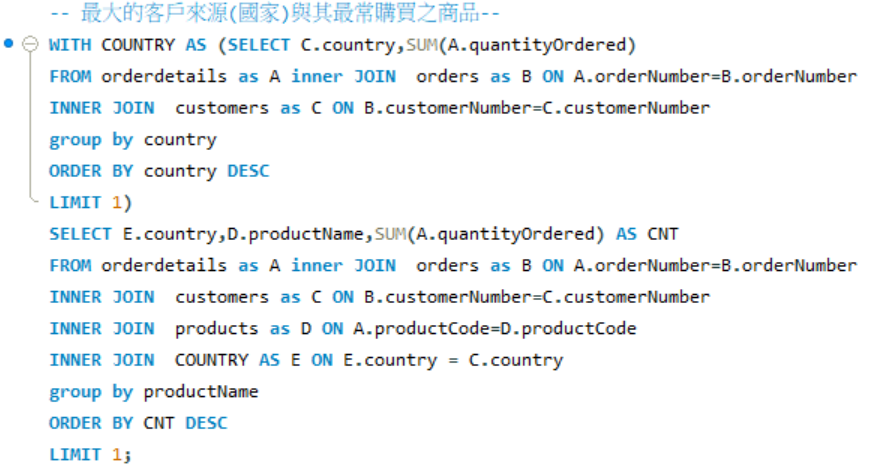

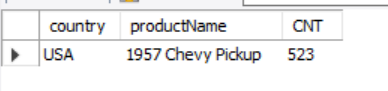

## 3 . 取得信用額度最高的"客戶"的購買產品清單

上述可知客戶編號103 為信用額度最高的客戶
- 首先將orders.orderdetails.products三張表join起來
- 用一個WITH 將CREDIT當作一個暫存表 SELECT出客戶編號,客戶名字,最大的信用額度 AS MAX_limit 
- 最後SELECT出客戶名字、最大信用額度、產品名字
- 得出這位顧客購買的商品清單


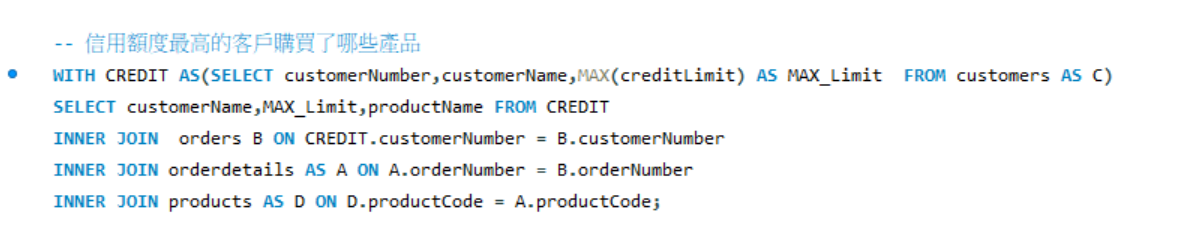

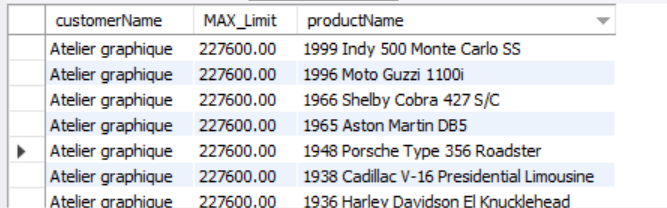

## 4 . 每一年度最熱銷的產品是來自哪個生產線 : 


### 2013年

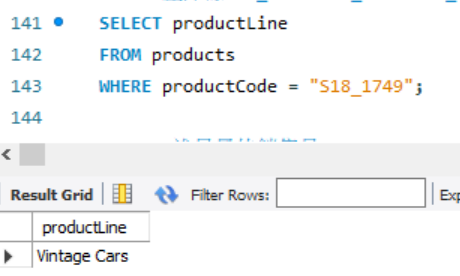

### 2014年

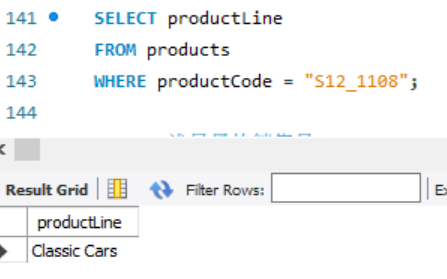

### 2015年

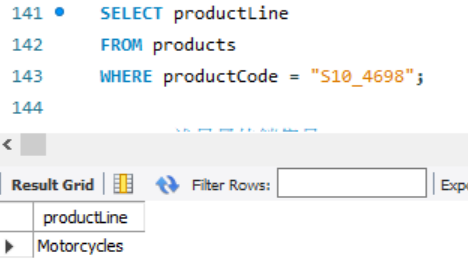

## 5.誰是最佳銷售員?

- 首先將需要的表格inner join起來
- SELECT ordersum為訂單數量的加總 as 一個新的變數叫做total_sales_Quanity ,加入 員工名字 ,YEAR 
- FROM (CONCACT是去連結員工的姓名) ,以年度去看
- 子查詢中去GROUP BY 員工名字、YEARS AS一個變數叫做BEST

- 最後去GROUP BY YEARS
- ORDER BY YEARS


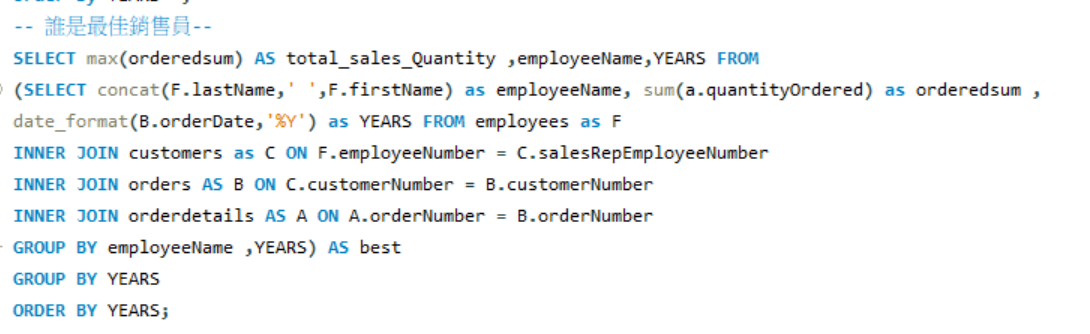

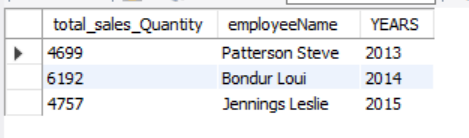